In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [57]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [90]:
# Data exploration

# functions for general checks
def BasicInfo(df):
    print(df.head())
    print(df.tail())
    print(df.dtypes)
    print(df.info())

def BasicNan(df):
    print(df.isnull().sum())
    print(f'Total duplication of rows: {df.duplicated().sum()}')

# functions for row checks
def NumColCheck(k:str):
    print(df[k].describe())
    fig, ax = plt.subplots(1, 2) 
    ax[0].boxplot(df[k])
    ax[0].set_title(f'Box plot of {k}')
    ax[1].hist(df[k])
    ax[1].set_title(f'Histogram of {k}')
    plt.show()

def StrColCheck(k:str):
    print(df[k].describe())
    plt.hist(df[k])
    plt.show()

# I. Basic properties check

In [61]:
BasicInfo(df)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [62]:
BasicNan(df)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
Total duplication of rows: 0


# II. People Check

## 1. Income and Education

In [99]:
# fillna with mean value
df['Income'].fillna(51969.861400, inplace=True)

# remove the outlier
df.drop(labels=2233,inplace=True)

/var/folders/91/5md42ts97634kl9z05d_nbyc0000gn/T/ipykernel_83328/1822139313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(51969.861400, inplace=True)


KeyError: '[2233] not found in axis'

count      2239.000000
mean      51969.861400
std       21410.586353
min        1730.000000
25%       35533.500000
50%       51717.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64


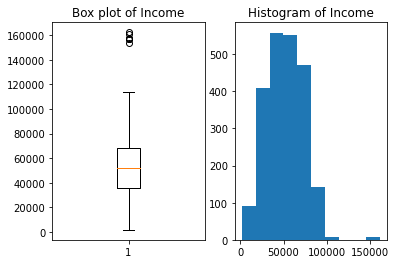

In [83]:
NumColCheck("Income")

count           2235
unique             5
top       Graduation
freq            1125
Name: Education, dtype: object


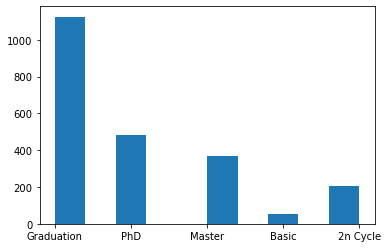

In [100]:
StrColCheck('Education')

/var/folders/91/5md42ts97634kl9z05d_nbyc0000gn/T/ipykernel_83328/880239350.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace({'PhD': 3})


count    2235.000000
mean        1.664877
std         0.839382
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Education, dtype: float64


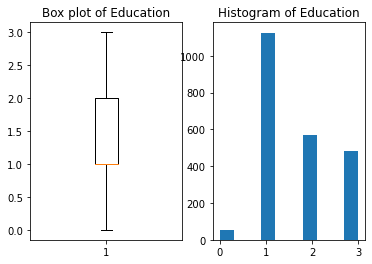

In [116]:
# merge 2n Cycle and Master
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})

# perform Ordinal Encoding
df['Education'] = df['Education'].replace({'Basic': 0})
df['Education'] = df['Education'].replace({'Graduation': 1})
df['Education'] = df['Education'].replace({'Master': 2})
df['Education'] = df['Education'].replace({'PhD': 3})

# Now it becomes numbers which is easier for clustering!!
NumColCheck('Education')

## 2. Family Members

count        2219
unique          5
top       Married
freq          859
Name: Marital_Status, dtype: object


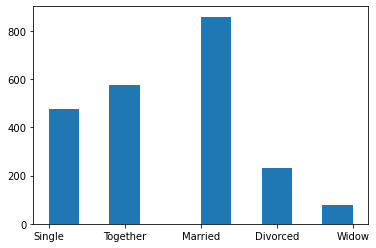

count    2219.000000
mean        0.446147
std         0.538974
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64


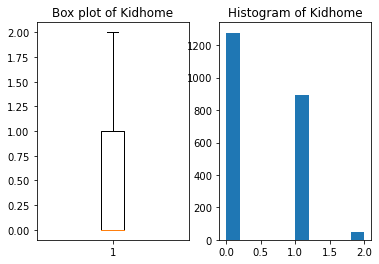

count    2219.000000
mean        0.507436
std         0.544100
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64


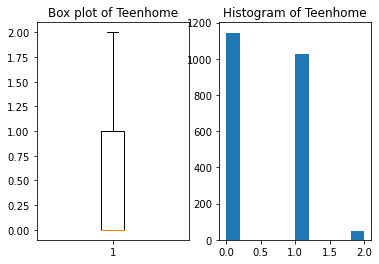

(None, None, None)

In [186]:
StrColCheck('Marital_Status'),NumColCheck("Kidhome"),NumColCheck('Teenhome')

count        2219
unique          5
top       Married
freq          859
Name: Marital_Status, dtype: object


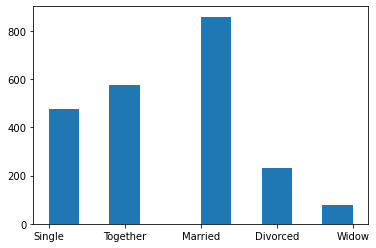

In [187]:
# Adjust Marital_Status

# merge Single and Alone
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single'})

# drop Absurd and Yolo
df['Marital_Status'] = df['Marital_Status'].replace({'Absurd': np.nan})
df['Marital_Status'] = df['Marital_Status'].replace({'YOLO': np.nan})
df.dropna(subset=['Marital_Status'],axis=0,inplace=True)

StrColCheck('Marital_Status')

In [188]:
# one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Marital_Status'])
df_encoded

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Childhome,FamilyMembers,AverageIncome,Age,NumTotalPurchase,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,1,58138.0,0,0,2012-04-09,58,635,88,...,0,1,58138.000000,55,22,False,False,True,False,False
1,2174,1954,1,46344.0,1,1,2014-08-03,38,11,1,...,2,3,15448.000000,60,4,False,False,True,False,False
2,4141,1965,1,71613.0,0,0,2013-08-21,26,426,49,...,0,2,71613.000000,48,20,False,False,False,True,False
3,6182,1984,1,26646.0,1,0,2014-10-02,26,11,4,...,1,3,17764.000000,30,6,False,False,False,True,False
4,5324,1981,3,58293.0,1,0,2014-01-19,94,173,43,...,1,3,38862.000000,33,14,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,61223.0,0,1,2013-06-13,46,709,43,...,1,3,40815.333333,46,16,False,True,False,False,False
2236,4001,1946,3,64014.0,2,1,2014-10-06,56,406,0,...,3,5,25605.600000,68,15,False,False,False,True,False
2237,7270,1981,1,56981.0,0,0,2014-01-25,91,908,48,...,0,1,56981.000000,33,18,True,False,False,False,False
2238,8235,1956,2,69245.0,0,1,2014-01-24,8,428,30,...,1,3,46163.333333,58,21,False,False,False,True,False


count    2219.000000
mean        0.953583
std         0.751979
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Childhome, dtype: float64


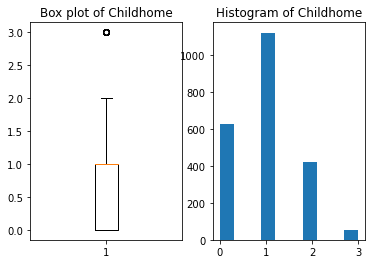

In [189]:
# Feature Engineering: Number of Children
df["Childhome"]= df['Kidhome']+df['Teenhome']
NumColCheck('Childhome')

count    2219.000000
mean        2.600270
std         0.905957
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FamilyMembers, dtype: float64


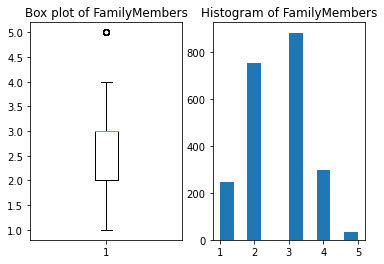

In [190]:
# Feature Engineering: Family Members
def calculate_family_members(marital_status, child):
    if marital_status in ['Married', 'Together']:
        return 2 + child
    else:
        return 1 + child

df['FamilyMembers'] = df.apply(lambda row: calculate_family_members(row['Marital_Status'], row['Childhome']), axis=1)

NumColCheck('FamilyMembers')

count      2219.00000
mean      37239.70573
std       23655.48945
min        1751.00000
25%       19004.25000
50%       29592.00000
75%       48706.00000
max      156924.00000
Name: AverageIncome, dtype: float64


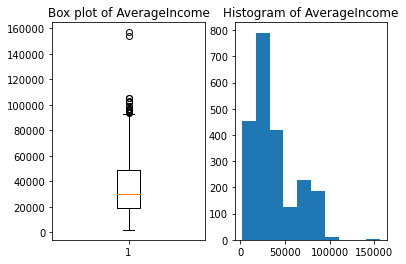

In [191]:
# Feature Engineering: Average income per person in family
# assumption: if there's two adults in the family, they're earning the same
def calculate_average_income(marital_status, members,income):
    if marital_status in ['Married', 'Together']:
        return income*2/members
    else:
        return income/members

df['AverageIncome'] = df.apply(lambda row: calculate_average_income(row['Marital_Status'], row['FamilyMembers'],row['Income']), axis=1)

NumColCheck('AverageIncome')

## 3. Date and Age

count    2235.000000
mean       44.236242
std        12.019144
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64


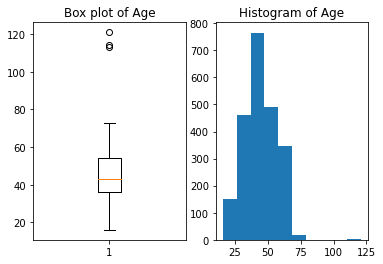

In [137]:
# convert to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format='mixed')

# calculate age
df["Age"] = df["Dt_Customer"].dt.year - df["Year_Birth"]
NumColCheck('Age')

count    2232.000000
mean       44.139785
std        11.734673
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


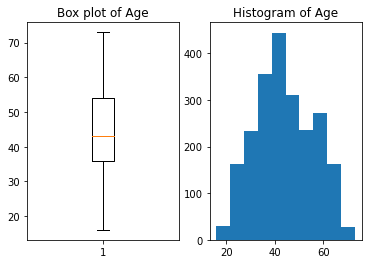

In [144]:
df.drop(df[df['Age'] > 100].index,inplace=True)
NumColCheck('Age')

## 4. Recency and Complaints

count    2239.000000
mean       49.121036
std        28.963662
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


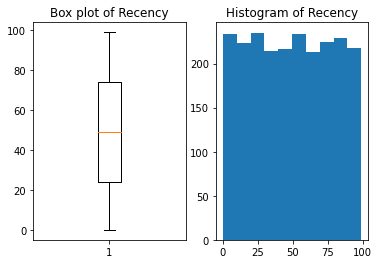

In [86]:
NumColCheck('Recency')

count    2239.000000
mean        0.009379
std         0.096412
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64


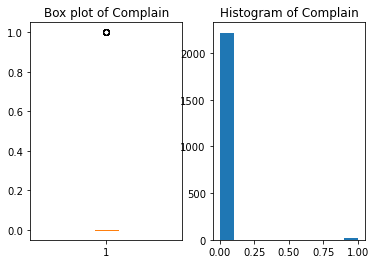

In [87]:
NumColCheck('Complain')

# III. Products check

count    2232.000000
mean      304.065412
std       336.871724
min         0.000000
25%        24.000000
50%       173.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64


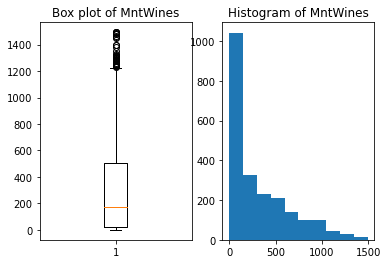

In [145]:
NumColCheck('MntWines')

count    2232.000000
mean       26.244624
std        39.711783
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64


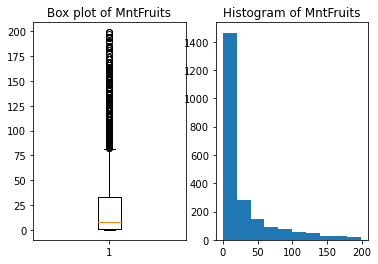

In [146]:
NumColCheck('MntFruits')

count    2232.000000
mean      166.957885
std       225.752900
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


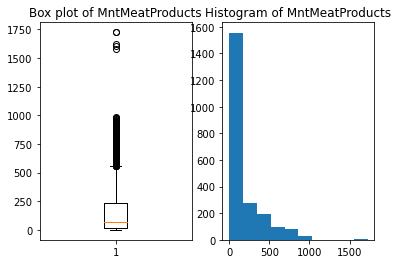

In [147]:
NumColCheck('MntMeatProducts')

In [159]:
df[df['MntMeatProducts']>1000][['Income','MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntGoldProds']]

,Income,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntGoldProds
21,2447.0000,1,1,1725,1,1
164,157243.0000,20,2,1582,2,1
687,160803.0000,55,16,1622,3,4
1653,157146.0000,1,0,1725,1,1
2228,51969.8614,32,2,1607,4,22


In [157]:
df[df['Income']>150000][['Income','MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntGoldProds']]

,Income,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntGoldProds
164,157243.0,20,2,1582,2,1
617,162397.0,85,1,16,1,2
655,153924.0,1,1,1,1,1
687,160803.0,55,16,1622,3,4
1300,157733.0,39,1,9,0,8
1653,157146.0,1,0,1725,1,1
2132,156924.0,2,1,2,1,1


count    2227.000000
mean      163.623260
std       214.719511
min         0.000000
25%        16.000000
50%        67.000000
75%       230.000000
max       984.000000
Name: MntMeatProducts, dtype: float64


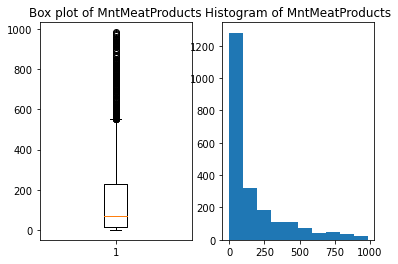

In [160]:
# it seems weird so we drop them
df.drop(df[df['MntMeatProducts'] > 1000].index,inplace=True)
NumColCheck('MntMeatProducts')

count    2232.000000
mean       37.415771
std        54.456115
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64


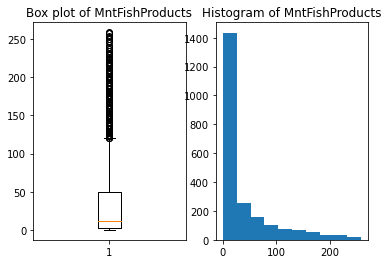

In [150]:
NumColCheck('MntFishProducts')

count    2227.000000
mean       27.154917
std        41.349471
min         0.000000
25%         1.000000
50%         8.000000
75%        33.500000
max       263.000000
Name: MntSweetProducts, dtype: float64


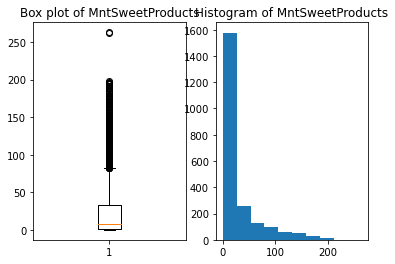

In [161]:
NumColCheck('MntSweetProducts')

count    2225.000000
mean       26.943371
std        40.761043
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       198.000000
Name: MntSweetProducts, dtype: float64


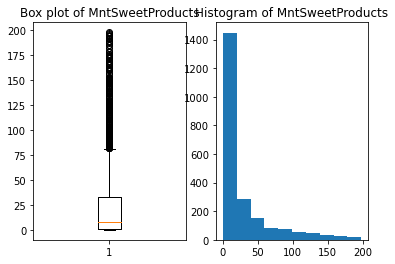

In [165]:
df.drop(df[df['MntSweetProducts']>200].index,inplace=True)
NumColCheck('MntSweetProducts')

count    2225.000000
mean       43.802247
std        51.474076
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       321.000000
Name: MntGoldProds, dtype: float64


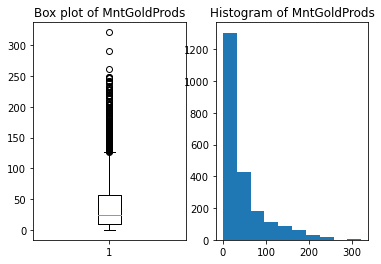

In [166]:
NumColCheck('MntGoldProds')

In [167]:
df[df['MntGoldProds']>250][['Income','MntGoldProds']]

,Income,MntGoldProds
1328,6560.0,262
1806,7144.0,291
1975,4428.0,321


In [169]:
df[df['MntGoldProds']>210][['Income','MntGoldProds']]

,Income,MntGoldProds
53,82582.0,241
98,78497.0,223
126,79607.0,216
179,78497.0,223
266,80124.0,241
347,84835.0,218
368,72025.0,233
463,80124.0,241
586,79800.0,224
702,71022.0,242


count    2222.000000
mean       43.468047
std        50.690252
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       249.000000
Name: MntGoldProds, dtype: float64


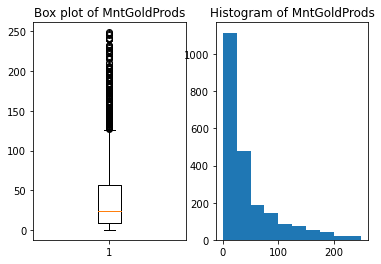

In [170]:
# drop the unrealistic data
df.drop(df[df['MntGoldProds']>250].index,inplace=True)
NumColCheck('MntGoldProds')

In [ ]:
# Feature Engineering:

# IV. Promotion and deal check

count    2222.000000
mean        2.314131
std         1.875784
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64


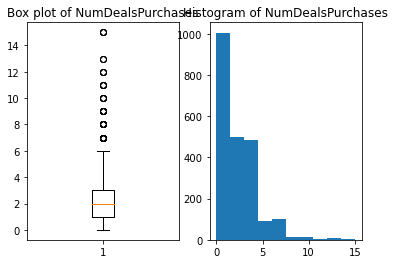

In [171]:
NumColCheck('NumDealsPurchases')

count    2222.000000
mean        4.057606
std         2.625904
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        11.000000
Name: NumWebPurchases, dtype: float64


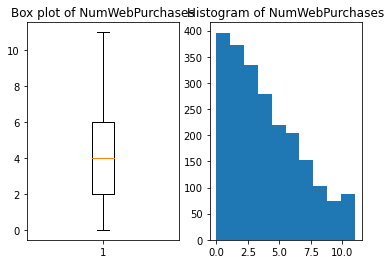

count    2222.000000
mean        5.333933
std         2.398429
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64


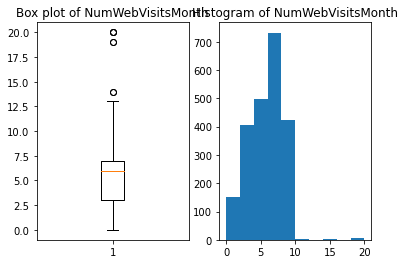

(None, None)

In [175]:
NumColCheck('NumWebPurchases'), NumColCheck('NumWebVisitsMonth')

In [178]:
df[df['NumWebPurchases']/df['NumWebVisitsMonth']>10][['NumWebPurchases','NumWebVisitsMonth']]

# 

,NumWebPurchases,NumWebVisitsMonth
905,3,0
975,2,0
1773,2,0
1910,3,0
1955,1,0


count    2222.000000
mean        2.624212
std         2.742204
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: NumCatalogPurchases, dtype: float64


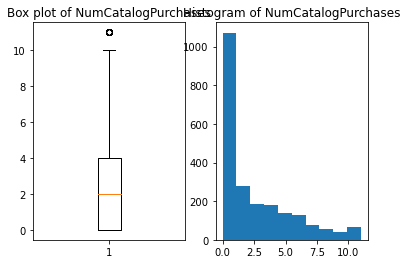

In [173]:
NumColCheck('NumCatalogPurchases')

count    2222.000000
mean        5.819082
std         3.240841
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


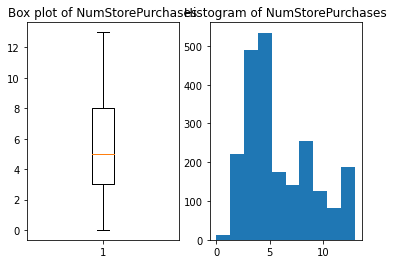

In [174]:
NumColCheck('NumStorePurchases')

count    2222.000000
mean       12.500900
std         7.170073
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: NumTotalPurchase, dtype: float64


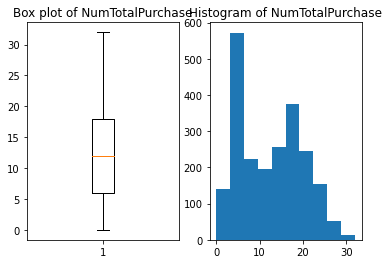

In [179]:
# Feature Engineering: 
df['NumTotalPurchase'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
NumColCheck('NumTotalPurchase')

In [183]:
# check errors: NumDealsPurchases > NumTotalPurchase
df.drop(df[df['NumTotalPurchase']-df['NumDealsPurchases']<0].index,inplace=True)

# V. Basic check again & heatmap

In [184]:
BasicInfo(df)

     ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          1         Single  58138.0        0         0   
1  2174        1954          1         Single  46344.0        1         1   
2  4141        1965          1       Together  71613.0        0         0   
3  6182        1984          1       Together  26646.0        1         0   
4  5324        1981          3        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  Z_CostContact  \
0  2012-04-09       58       635  ...             0         0              3   
1  2014-08-03       38        11  ...             0         0              3   
2  2013-08-21       26       426  ...             0         0              3   
3  2014-10-02       26        11  ...             0         0              3   
4  2014-01-19       94       173  ...             0         0              3   

   Z_Revenue  Response  Childhome  FamilyMembers  Averag

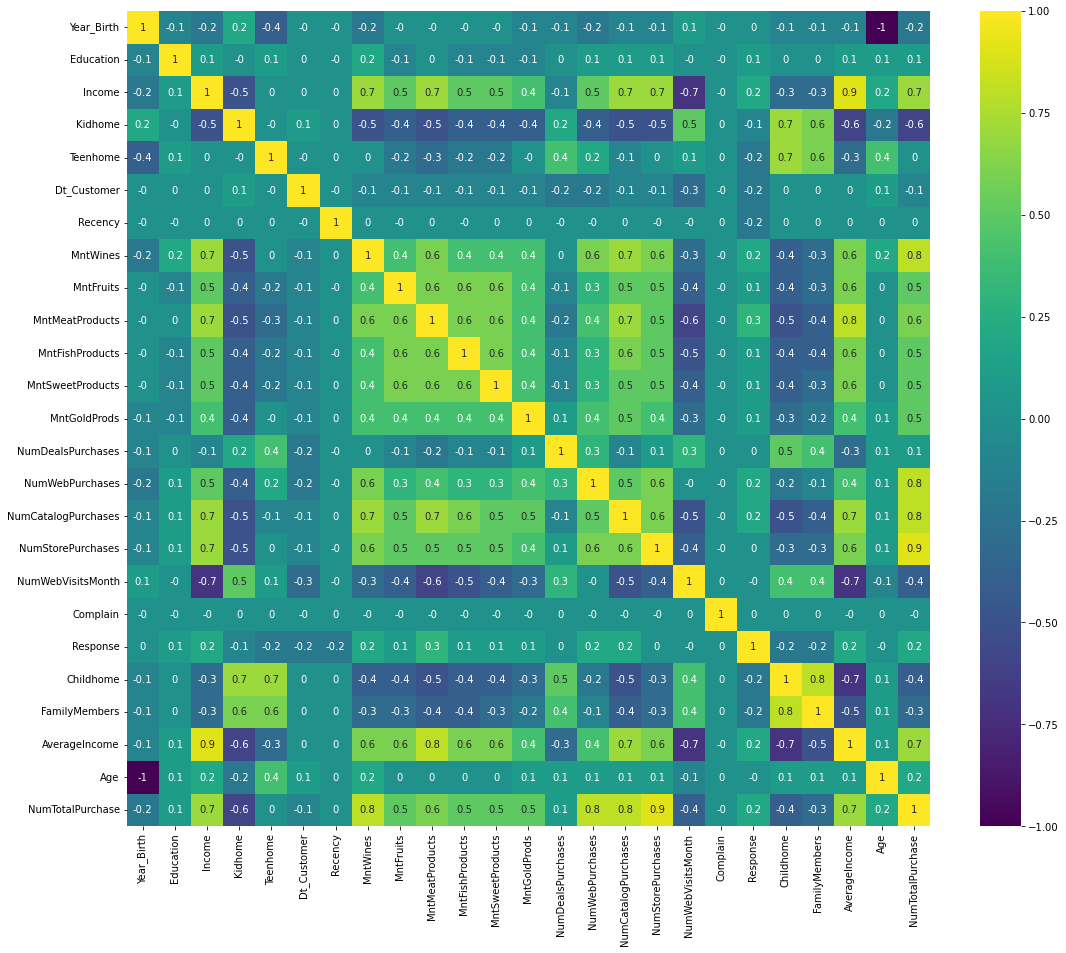

In [212]:
x = df.drop(['ID','Z_CostContact','Z_Revenue','Marital_Status','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],axis = 1)

plt.figure(figsize=(18,15))
ax = sns.heatmap(x.corr().round(1),annot = True,cmap = 'viridis')
plt.show()

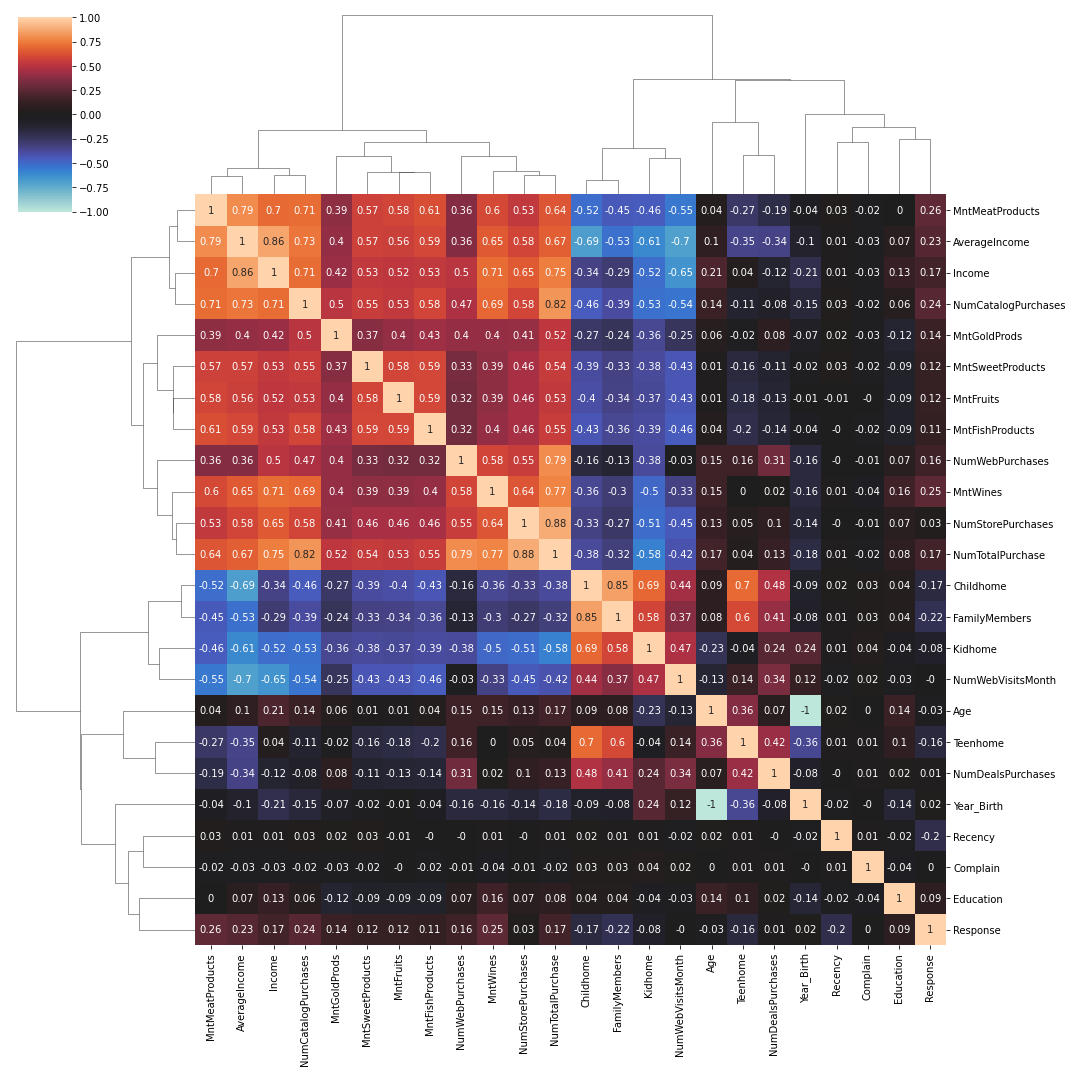

In [214]:
ax=sns.clustermap(
        x.corr('pearson', numeric_only=True).round(2),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=True,
        figsize=(15, 15)
    )

plt.show()

# Bonus: Insights
Some techniques to discover relationships between features (Age and Education here)

In [218]:
# gropuby analysis using Age
df1 = df.groupby('Age').agg({ 'Education' : 'count', 'Marital_Status' : 'count', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean', 
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'NumTotalPurchase' : 'mean'})

df1.head(20)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,NumTotalPurchase
Age,,,,,,,,,,,,,,
16,1,1,7500.000000,1,1,24.000000,3.000000,3.000000,1.000000,3.000000,9.000000,0,1,7.000000
17,2,2,81937.000000,2,2,49.000000,1.000000,4.500000,8.000000,10.000000,4.000000,1,1,22.500000
18,3,3,63545.000000,3,3,55.000000,1.000000,4.666667,2.333333,6.333333,3.333333,0,1,13.333333
19,3,3,46937.000000,3,3,53.333333,1.000000,1.666667,2.666667,5.333333,4.333333,0,0,9.666667
20,7,7,65593.000000,7,7,50.571429,1.428571,4.000000,5.571429,7.000000,3.857143,0,1,16.571429
21,12,12,48491.083333,12,12,41.833333,1.250000,3.083333,3.083333,4.750000,5.166667,0,1,10.916667
22,13,13,58952.692308,13,13,43.076923,1.076923,4.923077,4.615385,6.538462,4.153846,0,3,16.076923
23,22,22,44107.454545,22,22,41.363636,1.727273,3.090909,1.954545,5.136364,5.909091,0,5,10.181818
24,24,24,42121.160892,24,24,62.833333,1.500000,2.958333,2.916667,5.666667,5.125000,1,0,11.541667


In [220]:
# gropuby analysis using education
df2 = df.groupby('Education').agg({ 'Age' : 'mean', 'Education' : 'count', 'Marital_Status' : 'sum', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean', 
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'NumTotalPurchase' : 'mean'})
df2

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,NumTotalPurchase
Education,,,,,,,,,,,,,,,
0,35.314815,54,MarriedTogetherDivorcedMarriedTogetherMarriedT...,20306.259259,54,54,48.444444,1.796296,1.888889,0.481481,2.851852,6.870370,0,2,5.222222
1,43.464701,1119,SingleSingleTogetherTogetherDivorcedMarriedDiv...,52221.578744,1119,1119,50.141197,2.281501,4.101877,2.684540,5.862377,5.280608,14,151,12.648794
2,44.098592,568,TogetherDivorcedMarriedSingleDivorcedTogetherM...,51120.524700,568,568,47.906690,2.375000,3.947183,2.492958,5.788732,5.272887,5,79,12.228873
3,46.903766,478,MarriedMarriedTogetherTogetherSingleMarriedMar...,55737.243320,478,478,48.686192,2.297071,4.355649,2.895397,6.125523,5.269874,1,100,13.376569


# Export

In [185]:
df.to_csv('output.csv', index=False)